### Bài thực hành 1 
Xây dựng mô hình phân cụm K-means trên tập dữ liệu chim cánh cụt. Dữ liệu lấy tại 
https://www.kaggle.com/code/youssefaboelwafa/clustering-penguins-species-k-means-clustering

1. Import các gói thư viện và nạp dữ liệu vào notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

2. Mô tả dữ liệu

In [2]:
penguins_df = pd.read_csv("Dataset/penguins.csv")   
print(penguins_df.head())
print(penguins_df.info())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3               NaN              NaN                NaN          NaN     NaN
4              36.7             19.3              193.0       3450.0  FEMALE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB
None


3. Tiền xử lý dữ liệu

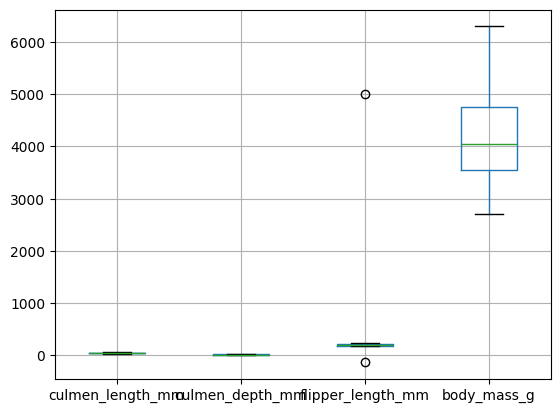

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g   sex
9              42.0             20.2             5000.0       4250.0  MALE
    culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g   sex
14              34.6             21.1             -132.0       4400.0  MALE


In [3]:
# Vẽ boxplot để quan sát phân bố và ngoại lai
penguins_df.boxplot()
plt.show()

# Loại toàn bộ các dòng chứa giá trị thiếu
penguins_df = penguins_df.dropna()

# (Tùy chọn) kiểm tra xem có giá trị flipper_length_mm bất thường hay không
print(penguins_df[penguins_df["flipper_length_mm"] > 4000])
print(penguins_df[penguins_df["flipper_length_mm"] < 0])

# Loại hai dòng ngoại lai giống notebook gốc
penguins_clean = penguins_df.drop([9, 14])

In [4]:
df = pd.get_dummies(penguins_clean).drop("sex_.", axis=1)
print(df.head())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0              39.1             18.7              181.0       3750.0   
1              39.5             17.4              186.0       3800.0   
2              40.3             18.0              195.0       3250.0   
4              36.7             19.3              193.0       3450.0   
5              39.3             20.6              190.0       3650.0   

   sex_FEMALE  sex_MALE  
0       False      True  
1        True     False  
2        True     False  
4        True     False  
5       False      True  


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df) 

# Đưa về DataFrame cho tiện xem
penguins_preprocessed = pd.DataFrame(X_scaled, columns=df.columns)
print(penguins_preprocessed.head(10))

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0         -0.905520         0.793126          -1.428125    -0.569709   
1         -0.831938         0.128503          -1.071522    -0.507579   
2         -0.684775         0.435252          -0.429637    -1.191006   
3         -1.347011         1.099875          -0.572278    -0.942487   
4         -0.868729         1.764498          -0.786240    -0.693968   
5         -0.942311         0.333002          -1.428125    -0.725033   
6         -0.887125         1.253249          -0.429637     0.579691   
7         -0.537611         0.230753          -1.356804    -1.253136   
8         -0.997497         2.071247          -0.714919    -0.507579   
9         -1.365406         0.333002          -1.142843    -0.631839   

   sex_FEMALE  sex_MALE  
0   -0.991031  0.997001  
1    1.009050 -1.003008  
2    1.009050 -1.003008  
3    1.009050 -1.003008  
4   -0.991031  0.997001  
5    1.009050 -1.003008  
6   -0.991031  0.997001  

4. Giảm chiều dữ liệu bằng PCA

Mặc dù dữ liệu sau mã hóa chỉ có sáu chiều, việc giảm chiều giúp trực quan hóa phân cụm trong không gian 2D và loại bỏ nhiễu. Tác giả gốc áp dụng PCA, tính tỉ lệ phương sai giải thích của từng thành phần, rồi giữ lại những thành phần có tỉ lệ lớn hơn 0.1; kết quả là giữ lại hai thành phần chính.

In [6]:
pca = PCA(n_components=None)
dfx_pca = pca.fit(penguins_preprocessed)
dfx_pca.explained_variance_ratio_
n_components = sum(dfx_pca.explained_variance_ratio_ > 0.1)
pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)
print(n_components)

2


In [7]:
print(penguins_PCA.shape)

(333, 2)


5. Xác định số cụm tối ưu bằng Elbow Method

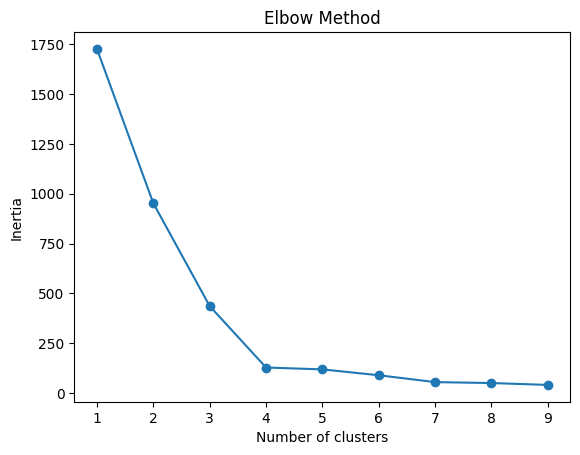

In [8]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_PCA)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()
n_clusters = 4

6. Xây dựng mô hình K-means và trực quan hóa kết quả

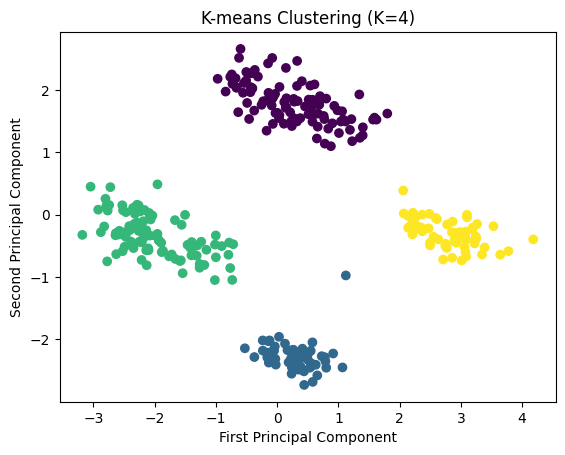

In [9]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_PCA)
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_, cmap="viridis")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"K-means Clustering (K={n_clusters})")
plt.show()

### KẾT THÚC